In [1]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

[DEBUG] Using default logger (stdout, stderr).


In [2]:
taxa = ['B_caccae',                     # 0     
        'B_cellulosilyticus_WH2',       # 1
        'B_ovatus',
        'B_thetaiotaomicron',
        'B_uniformis',
        'B_vulgatus',                   # 5
        'C_aerofaciens',
        'C_scindens',
        'C_spiroforme',
        'P_distasonis',
        'R_obeum'
        ]

# pretty_names_dir = {'B_caccae': '$B. caccae$',
#                 'B_cellulosilyticus_WH2': '$B. cellulosilyticus$',
#                 'B_ovatus': '$B. ovatus$',
#                 'B_thetaiotaomicron': '$B. thetaiotaomicron$',
#                 'B_uniformis': '$B. uniformis$',
#                 'B_vulgatus': '$B. vulgatus$',
#                 'C_aerofaciens': '$C. aerofaciens$',
#                 'C_scindens': '$C. scindens$',
#                 'C_spiroforme': '$C. spiroforme$',
#                 'P_distasonis': '$P. distasonis$',
#                 'R_obeum': '$R. obeum$',
#                 'S': '$M1$',
#                 'T': '$M2$',
#                 'U': '$M3$',
#                 }

pretty_names_dir = {'B_caccae': 'Bca',
                'B_cellulosilyticus_WH2': 'Bce',
                'B_ovatus': 'Bov',
                'B_thetaiotaomicron': 'Bth',
                'B_uniformis': 'Bun',
                'B_vulgatus': 'Bvu',
                'C_aerofaciens': 'Cae',
                'C_scindens': 'Csc',
                'C_spiroforme': 'Csp',
                # 'D_longicatena': 'Dlo',
                'P_distasonis': 'Pdi',
                'R_obeum': 'Rob',
                'S': '$C_{1}$',
                'T': '$C_{2}$',
                'U': '$C_{3}$',
                }

cols = ['#b91f1c',
        '#016bff',
        '#308937',
        '#ff8137',
        '#6f4fc7',
        '#d4b300',
        '#893a2b',
        '#ff6c79',
        '#16c4ff',
        '#766f41',
        '#00c800',
        # '#af3261'
        ]

In [3]:
growth = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/growth.npy')
interactions = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/interactions.npy')
perturbations = np.load('mcnulty-results/mcnulty-HF0-seed12/posteriors/perturbations.npz')['LF/HPP']
perturbations_start = [13]
perturbations_end = [27]
dt = 0.01
start_time = 0
n_days = 40
initial_conditions = pd.read_table('mcnulty-results/mcnulty-LF0-seed96/initial_abundances.tsv', header=None, index_col=0).values

In [4]:
base = []

for i in range(0, growth.shape[0], 20):
    initial_conditions_ex = initial_conditions.copy()
    initial_conditions_ex[2,0] = 0
    initial_conditions_ex[3,0] = 0
    initial_conditions_ex[4,0] = 0
    initial_conditions_ex[6,0] = 0
    initial_conditions_ex[7,0] = 0
    initial_conditions_ex[8,0] = 0
    initial_conditions_ex[9,0] = 0
    initial_conditions_ex[10,0] = 0
    dyn = md2.model.gLVDynamicsSingleClustering(
        growth=growth[i],
        interactions=interactions[i],
        perturbations=[perturbations[i]],
        perturbation_starts=perturbations_start,
        perturbation_ends=perturbations_end,
        start_day=start_time
        )
    x = md2.integrate(
        dynamics=dyn,
        initial_conditions=initial_conditions_ex,
        dt=dt,
        n_days=n_days + dt,
        subsample=False
    )
    base.append(x['X'])

base = np.array(base)
times = x['times']

base_mean = base.mean(axis=0)
base_std = base.std(axis=0)

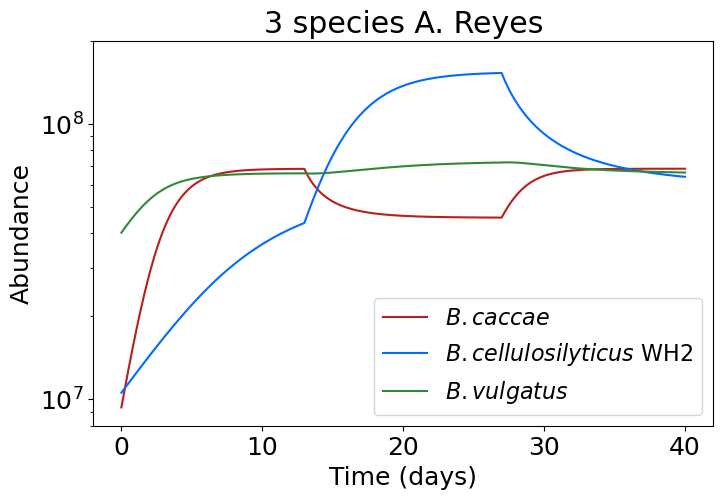

In [25]:
plt.rc('font', size=18)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(times, base_mean[0], label='$B. caccae$', lw=1.5, c=cols[0])
ax.plot(times, base_mean[1], label='$B. cellulosilyticus$ WH2', lw=1.5, c=cols[1])
ax.plot(times, base_mean[5], label='$B. vulgatus$', lw=1.5, c=cols[2])
ax.legend(fontsize=16)
ax.set_yscale('log')
ax.set_ylim([8e6,2e8])
ax.set_title('3 species A. Reyes')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Abundance')
# fig.savefig('mcnulty-results/mcnulty-HF0-seed12/keystoneness-individual/trajectories.svg', bbox_inches='tight')
plt.show()